### EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("loan_data.csv")

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   person_age                      45000 non-null  float64 
 1   person_gender                   45000 non-null  object  
 2   person_education                45000 non-null  object  
 3   person_income                   45000 non-null  float64 
 4   person_emp_exp                  45000 non-null  int64   
 5   person_home_ownership           45000 non-null  object  
 6   loan_amnt                       45000 non-null  float64 
 7   loan_intent                     45000 non-null  object  
 8   loan_int_rate                   45000 non-null  float64 
 9   loan_percent_income             45000 non-null  float64 
 10  cb_person_cred_hist_length      45000 non-null  float64 
 11  credit_score                    45000 non-null  int64   
 12  previous_loan_defa

In [45]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


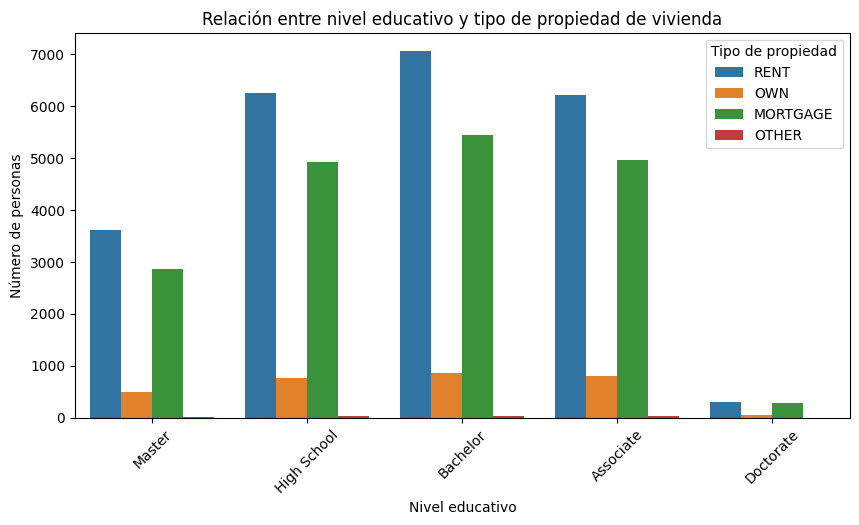

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='person_education', hue='person_home_ownership')
plt.title('Relación entre nivel educativo y tipo de propiedad de vivienda')
plt.xlabel('Nivel educativo')
plt.ylabel('Número de personas')
plt.legend(title='Tipo de propiedad')
plt.xticks(rotation=45)
plt.show()


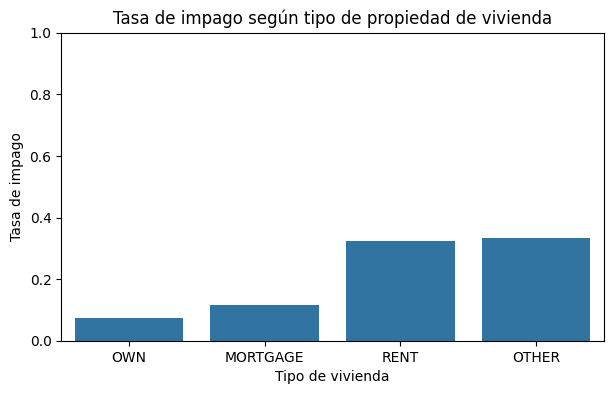

In [15]:
plt.figure(figsize=(7, 4))
home_default = df.groupby('person_home_ownership')['loan_status'].mean().sort_values()
sns.barplot(x=home_default.index, y=home_default.values)
plt.title('Tasa de impago según tipo de propiedad de vivienda')
plt.ylabel('Tasa de impago')
plt.xlabel('Tipo de vivienda')
plt.ylim(0, 1)
plt.show()


C:\Users\paumo\AppData\Local\Temp\ipykernel_6384\3156869084.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  burden_default = df.groupby('debt_burden')['loan_status'].mean()


(0.0, 1.0)

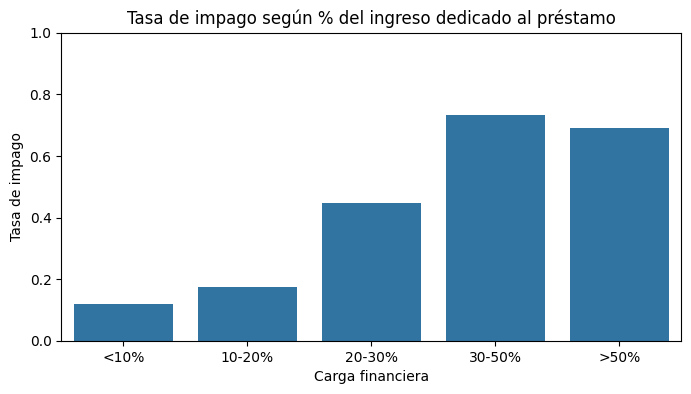

In [43]:
df['debt_burden'] = pd.cut(df['loan_percent_income'],
                           bins=[0, 0.1, 0.2, 0.3, 0.5, 1.0],
                           labels=['<10%', '10-20%', '20-30%', '30-50%', '>50%'])

burden_default = df.groupby('debt_burden')['loan_status'].mean()

plt.figure(figsize=(8, 4))
sns.barplot(x=burden_default.index, y=burden_default.values)
plt.title('Tasa de impago según % del ingreso dedicado al préstamo')
plt.ylabel('Tasa de impago')
plt.xlabel('Carga financiera')
plt.ylim(0, 1)


Text(0.5, 1.0, 'Distribución del tipo de vivienda de los solicitantes')

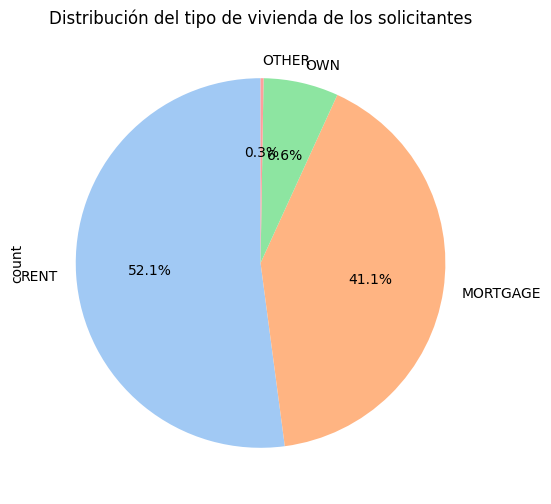

In [42]:
plt.figure(figsize=(6, 6))
df['person_home_ownership'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Distribución del tipo de vivienda de los solicitantes')



C:\Users\paumo\AppData\Local\Temp\ipykernel_6384\675535530.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_income.index, y=mean_income.values, palette='pastel')


Text(0, 0.5, 'Ingreso medio (€)')

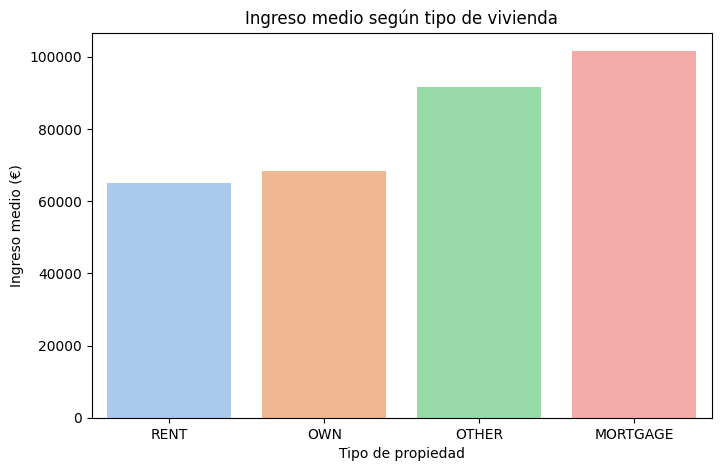

In [41]:
plt.figure(figsize=(8, 5))
mean_income = df.groupby('person_home_ownership')['person_income'].mean().sort_values()
sns.barplot(x=mean_income.index, y=mean_income.values, palette='pastel')
plt.title('Ingreso medio según tipo de vivienda')
plt.xlabel('Tipo de propiedad')
plt.ylabel('Ingreso medio (€)')


Text(0.5, 1.0, 'Heatmap de correlación (features seleccionadas)')

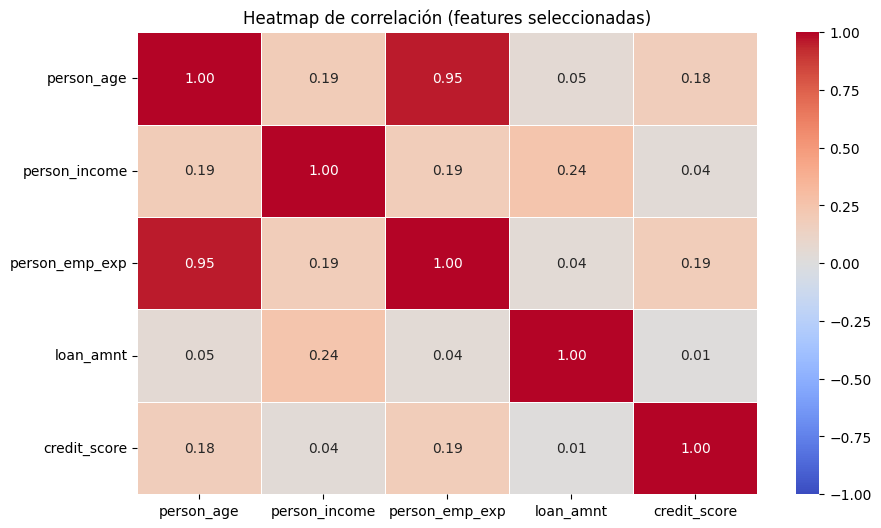

In [40]:
selected_features = [
    'person_age',
    'person_gender',
    'person_education',
    'person_income',
    'person_emp_exp',
    'person_home_ownership',
    'loan_amnt',
    'loan_intent',
    'credit_score',
    'previous_loan_defaults_on_file'
]

numerical_selected = df[selected_features].select_dtypes(include=['int64', 'float64'])

correlation_matrix = numerical_selected.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmax= 1, vmin= -1)
plt.title('Heatmap de correlación (features seleccionadas)')
